# ExactSpace Data Science Internship Assessment


# Done By: S. Vamsidhar

## Contents of this notebook

## 1. Data Pre-Processing

## 2. Data Visualizations

## 3. Abnormal Conditions Detection

## Data Pre-Processing Part

In [1]:
# Importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from datetime import datetime

In [2]:
# Reading and Understanding the data

data = pd.read_excel("data.xlsx")

C:\Users\vamsi\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
data.head(10)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
5,2017-01-01 00:25:00,878.54,932.38,-188.37,-177.98,870.31,-146.92
6,2017-01-01 00:30:00,905.94,951.32,-184.2,-182.67,889.39,-151.83
7,2017-01-01 00:35:00,877.83,939.63,-184.2,-181.17,875.75,-149.7
8,2017-01-01 00:40:00,871.01,938.73,-184.2,-181.17,871.35,-145.62
9,2017-01-01 00:45:00,905.46,939.06,-182.63,-178.23,871.35,-148.88


In [4]:
data.shape

(377719, 7)

In [5]:
data.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [6]:
data.nunique()

time                        377719
Cyclone_Inlet_Gas_Temp       39736
Cyclone_Material_Temp        39662
Cyclone_Outlet_Gas_draft     27669
Cyclone_cone_draft           26487
Cyclone_Gas_Outlet_Temp      48044
Cyclone_Inlet_Draft          24010
dtype: int64

In [7]:
# Finding out if any textual (categorical) data is present so that it can be treated

textual_values = data.loc[data['Cyclone_cone_draft'].apply(lambda x: isinstance(x, str)), 'Cyclone_cone_draft'].unique()
print(textual_values)

['I/O Timeout' 'Not Connect' 'Scan Timeout' 'Configure' 'Comm Fail']


#### These instances of categorical data can be definitely considered as abnormal operations as they occur due to technical issues from the industry side.

In [8]:
# Checking out the number of instances of those categorical data

print(data.loc[data['Cyclone_cone_draft'] == 'I/O Timeout'].shape)

(470, 7)


In [9]:
print(data.loc[data['Cyclone_Material_Temp'] == 'I/O Timeout'].shape)

(470, 7)


In [10]:
print(data.loc[data['Cyclone_cone_draft'] == 'Not Connect'].shape)

(723, 7)


In [11]:
print(data.loc[data['Cyclone_Material_Temp'] == 'Not Connect'].shape)

(723, 7)


In [12]:
# Treating the data so that it contains only numeric data types along with the "time" variable making 
# further investigation possible as with the presence of textual data, anomaly detection isn't possible. 
# This method converts all textual instances to NaN

data.iloc[:, 1:7] = data.iloc[:, 1:7].apply(pd.to_numeric, errors = "coerce")

In [13]:
data.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

In [14]:
# Checking for null values and removing them as they interrupt our investigation and won't be of much use

data.isnull().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [15]:
data = data.dropna()

In [16]:
data.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [17]:
data.shape

(376124, 7)

In [18]:
# Understanding some basic statistical insights about the data

data.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000
mean,727.387946,750.828429,-177.830733,-164.582678,715.798475,-141.309826
std,328.634044,350.922335,99.138694,90.096403,325.316433,77.609444
min,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,856.280000,867.660000,-247.190000,-226.770000,802.040000,-193.510000
50%,882.380000,913.360000,-215.260000,-198.570000,871.530000,-169.460000
75%,901.120000,943.660000,-170.150000,-143.680000,899.300000,-136.310000
max,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


#### Now that we are done with the data pre-processing part, let's move on to the data visualization part

## Data Visualization Part

#### Now we will be doing some univariate analysis on individual numeric variables to find out the distribution of the variable's values 

C:\Users\vamsi\AppData\Local\Temp\ipykernel_5372\3481286058.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["Cyclone_Inlet_Gas_Temp"], color = 'g')


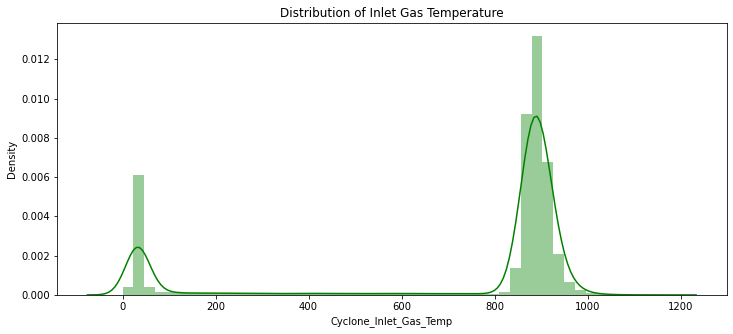

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Inlet Gas Temperature")
ax = sns.distplot(data["Cyclone_Inlet_Gas_Temp"], color = 'g')

C:\Users\vamsi\AppData\Local\Temp\ipykernel_5372\3491846388.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["Cyclone_Material_Temp"], color = 'c')


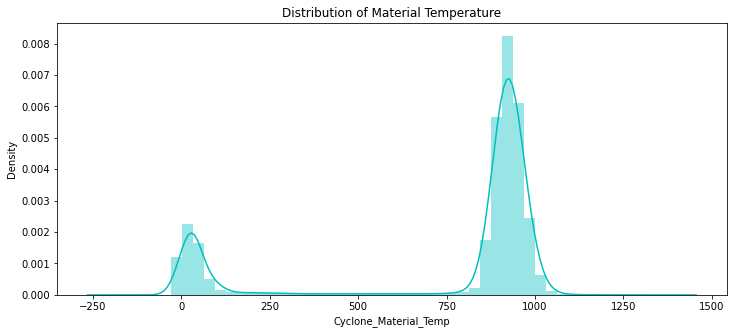

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Material Temperature")
ax = sns.distplot(data["Cyclone_Material_Temp"], color = 'c')

C:\Users\vamsi\AppData\Local\Temp\ipykernel_5372\359786396.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["Cyclone_Gas_Outlet_Temp"], color = 'r')


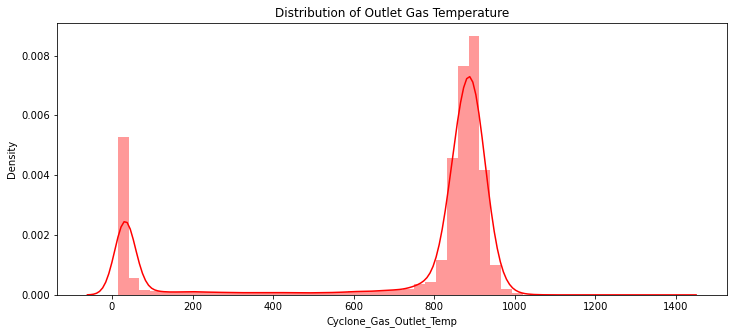

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Outlet Gas Temperature")
ax = sns.distplot(data["Cyclone_Gas_Outlet_Temp"], color = 'r')

C:\Users\vamsi\AppData\Local\Temp\ipykernel_5372\3639347078.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["Cyclone_Inlet_Draft"], color = 'm')


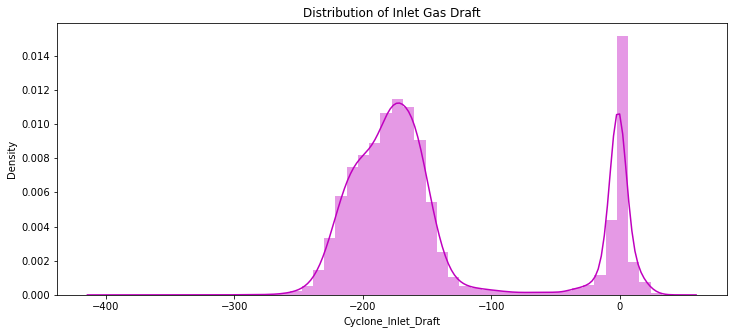

In [22]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Inlet Gas Draft")
ax = sns.distplot(data["Cyclone_Inlet_Draft"], color = 'm')

C:\Users\vamsi\AppData\Local\Temp\ipykernel_5372\703651448.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["Cyclone_cone_draft"], color = 'b')


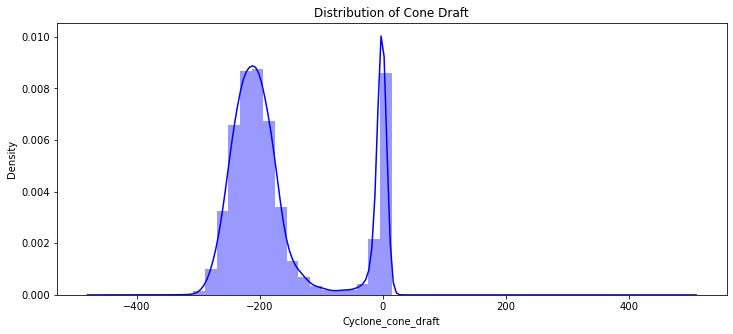

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Cone Draft")
ax = sns.distplot(data["Cyclone_cone_draft"], color = 'b')

C:\Users\vamsi\AppData\Local\Temp\ipykernel_5372\2071539827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["Cyclone_Outlet_Gas_draft"], color = 'y')


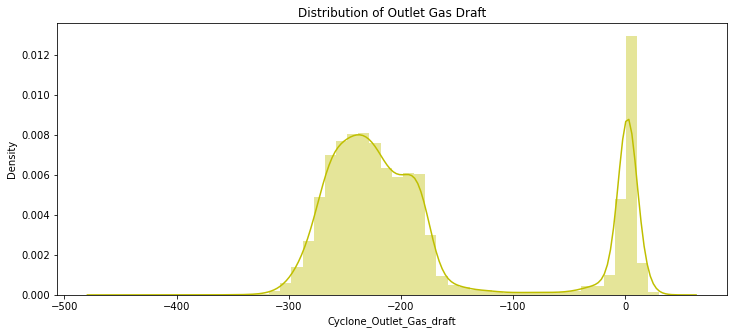

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Outlet Gas Draft")
ax = sns.distplot(data["Cyclone_Outlet_Gas_draft"], color = 'y')

#### By observing the above plots, we can find that there are some instances that stand out from the crowd making them look apparently abnormal (are they none other than outliers?). In order to confirm this claim, we need to do some statistical work

#### Now, let's do some bivariate analysis to check the same. We will be using line graphs in this context

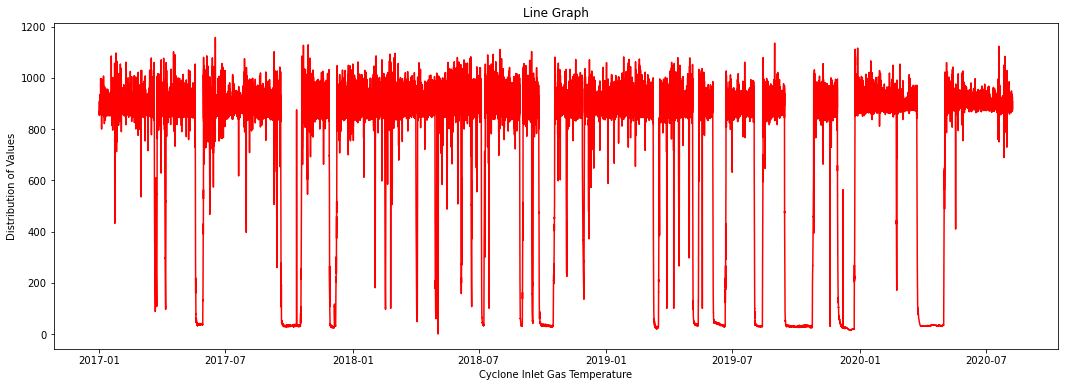

In [25]:
plt.figure(figsize=(18,6))

plt.plot(data['time'], data['Cyclone_Inlet_Gas_Temp'], color = "red")

# Set labels and title
plt.xlabel('Cyclone Inlet Gas Temperature')
plt.ylabel('Distribution of Values')
plt.title('Line Graph')

# Display the line graph
plt.show()

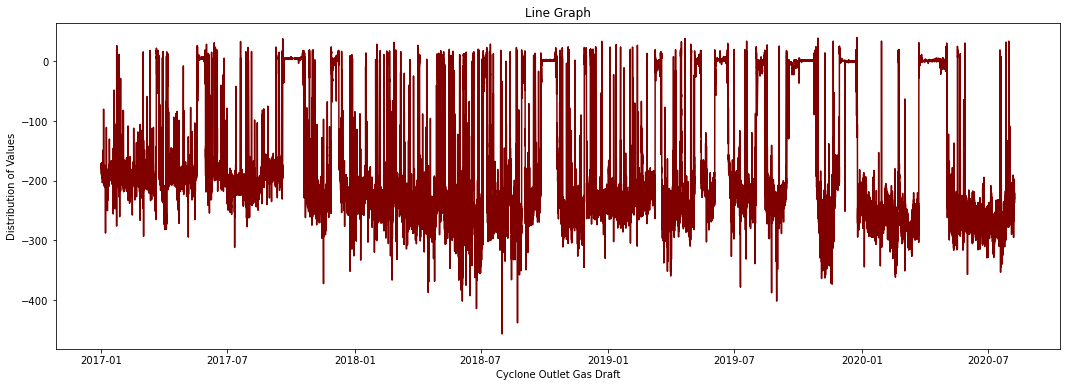

In [26]:
plt.figure(figsize=(18,6))

plt.plot(data['time'], data['Cyclone_Outlet_Gas_draft'], color = "maroon")

# Set labels and title
plt.xlabel('Cyclone Outlet Gas Draft')
plt.ylabel('Distribution of Values')
plt.title('Line Graph')

# Display the line graph
plt.show()

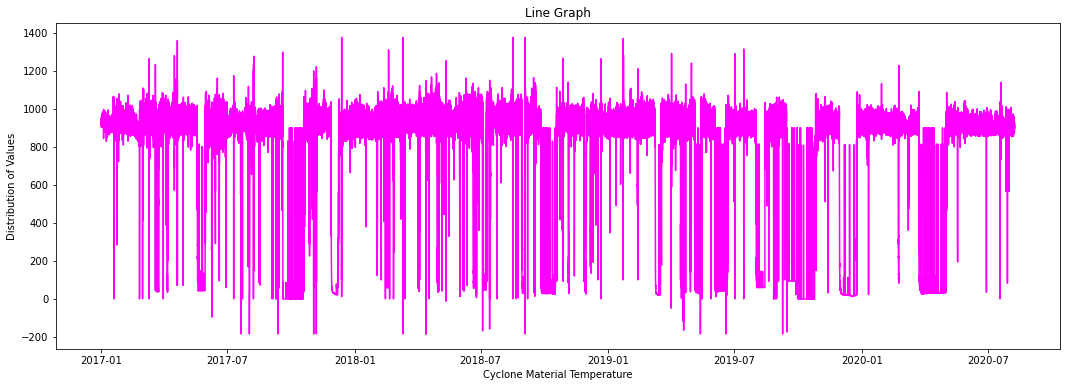

In [27]:
plt.figure(figsize=(18,6))

plt.plot(data['time'], data['Cyclone_Material_Temp'], color = "magenta")

# Set labels and title
plt.xlabel('Cyclone Material Temperature')
plt.ylabel('Distribution of Values')
plt.title('Line Graph')

# Display the line graph
plt.show()

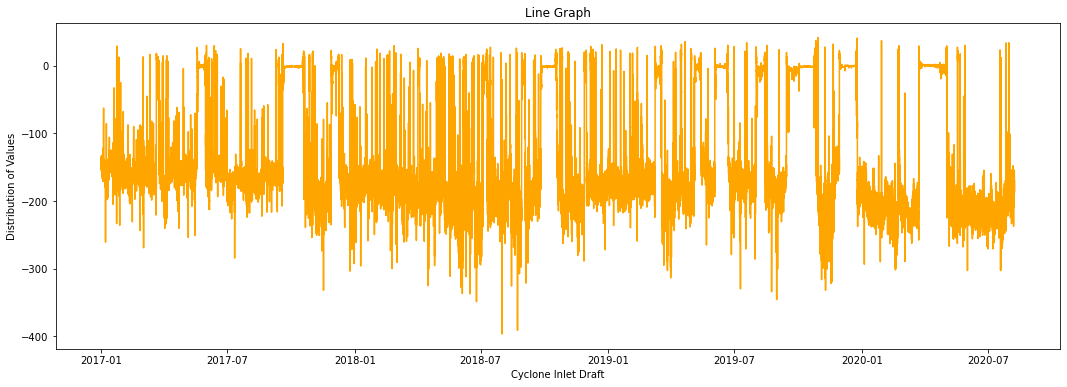

In [28]:
plt.figure(figsize=(18,6))

plt.plot(data['time'], data['Cyclone_Inlet_Draft'], color = "orange")

# Set labels and title
plt.xlabel('Cyclone Inlet Draft')
plt.ylabel('Distribution of Values')
plt.title('Line Graph')

# Display the line graph
plt.show()

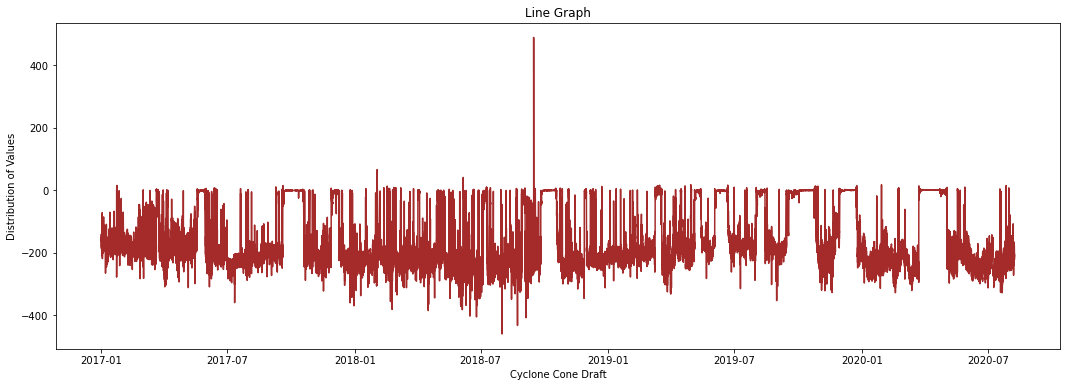

In [29]:
plt.figure(figsize=(18,6))

plt.plot(data['time'], data['Cyclone_cone_draft'], color = "brown")

# Set labels and title
plt.xlabel('Cyclone Cone Draft')
plt.ylabel('Distribution of Values')
plt.title('Line Graph')

# Display the line graph
plt.show()

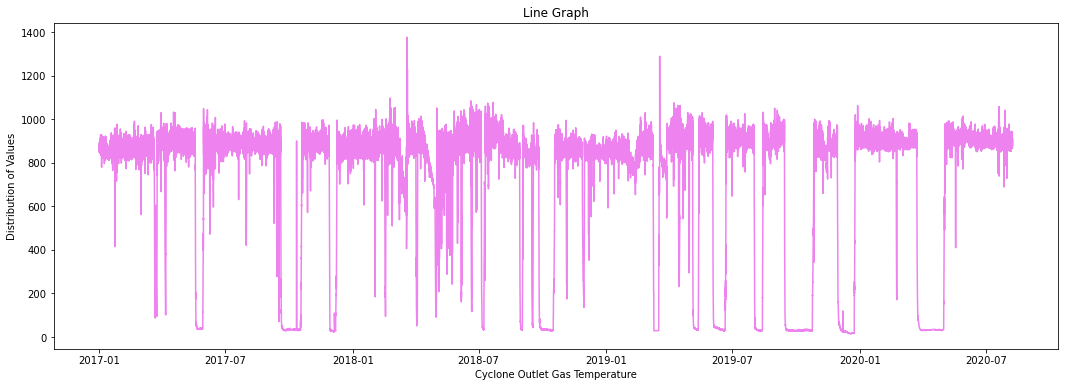

In [30]:
plt.figure(figsize=(18,6))

plt.plot(data['time'], data['Cyclone_Gas_Outlet_Temp'], color = "violet")

# Set labels and title
plt.xlabel('Cyclone Outlet Gas Temperature')
plt.ylabel('Distribution of Values')
plt.title('Line Graph')

# Display the line graph
plt.show()

#### The same as the case of univariate analysis can be observed here i.e. apparent abnormal instances

#### Now, let's do some mutli-variate analysis to check the same. We will be using collective boxplots in this context

Text(0, 0.5, 'Distribution of Values')

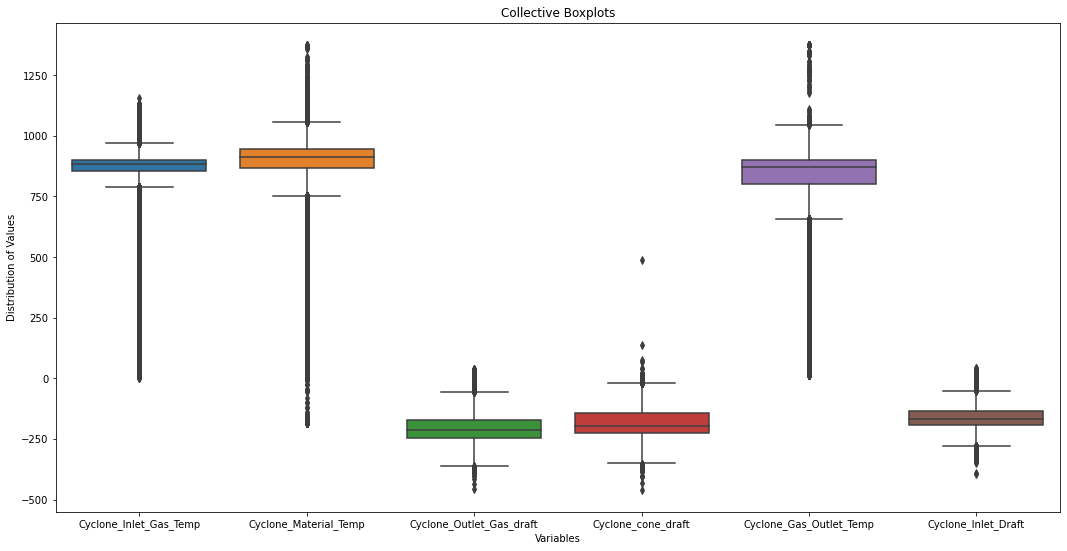

In [31]:
plt.figure(figsize=(18,9))
data1 = pd.melt(data.iloc[:, 1:7])

# Set labels and title
sns.boxplot(x = 'variable', y = 'value', data = data1).set(title = "Collective Boxplots")

plt.xlabel('Variables')
plt.ylabel('Distribution of Values')

#### The above visualization confirms the presence of outliers. The bold black data points above and below the extreme whiskers (horizontal lines) of the box plots represent outliers 

#### Now, the main question that arises here is, are outliers the abnormal cases we are trying to find? Yes, to some extent. Outliers nearby to the whiskers aren't much of a bother as they are most likely to occur in the case of dynamic working environment conditions

#### For example, there happens regular cases of high/low temperature/pressure conditions to some extent which are a part and parcel of dynamic factory environment conditions. But, elevated conditions (very high/low temperature/pressure) of the same are considered to be abnormal as they occur due to technical issues which often pose a serious threat to the industry considering the possibility of potential blasts/explosions

#### In order to trace out those extreme conditions, we have to find out the outliers somewhat far from the whiskers

#### Now that we are done with the data visualization part, let's move on to the abnormal conditions detection part

## Abnormal Conditions Detection Part

#### Let's find out the far lying outliers with respect to the whiskers with the help of Z-Score method for each variable

In [32]:
data2 = data['Cyclone_Inlet_Gas_Temp'] 

# Z-Score Method

upper_bound = data2.mean() + 3 * data2.std() # Right from the mean
lower_bound = data2.mean() - 3 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  -258.51418652475525
The upper limit of normal conditions:  1713.2900789432229
Lower Abnormal Cases are:  []
Upper Abnormal Cases are:  []


In [33]:
data2 = data['Cyclone_Inlet_Gas_Temp'] 

# Z-Score Method

upper_bound = data2.mean() + 2 * data2.std() # Right from the mean
lower_bound = data2.mean() - 2 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  70.11985771990771
The upper limit of normal conditions:  1384.6560346985598
Lower Abnormal Cases are:  [0.0, 14.38, 14.39, 14.4, 14.41, 14.42, 14.45, 14.47, 14.48, 14.49, 14.5, 14.51, 14.52, 14.55, 14.56]
Upper Abnormal Cases are:  [69.84, 69.86, 69.87, 69.89, 69.91, 69.92, 69.95, 69.97, 69.98, 69.99, 70.03, 70.04, 70.06, 70.07, 70.09]


In [34]:
data2 = data['Cyclone_Inlet_Gas_Temp'] 

# Z-Score Method

upper_bound = data2.mean() + 1 * data2.std() # Right from the mean
lower_bound = data2.mean() - 1 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  398.75390196457073
The upper limit of normal conditions:  1056.0219904538967
Lower Abnormal Cases are:  [0.0, 14.38, 14.39, 14.4, 14.41, 14.42, 14.45, 14.47, 14.48, 14.49, 14.5, 14.51, 14.52, 14.55, 14.56]
Upper Abnormal Cases are:  [1095.63, 1097.0, 1097.85, 1101.62, 1102.02, 1102.99, 1110.69, 1111.46, 1116.0, 1116.06, 1123.07, 1127.13, 1127.16, 1128.94, 1135.63]


#### In this method, data points lying +/- 3 standard deviations away from the mean are considered perfect outliers. But in this case, there are no data points in the outlier range. But, fixing the threshold as +/- 2 standard deviations gives us some decent amout of data points that stand out from the crowd on comparison with the collective boxplot visualization making the points somewhat our so called potential targets

#### Now, let's do the same for other variables

In [35]:
data2 = data['Cyclone_Material_Temp'] 

# Z-Score Method

upper_bound = data2.mean() + 3 * data2.std() # Right from the mean
lower_bound = data2.mean() - 3 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  -301.93857500416425
The upper limit of normal conditions:  1803.5954338590927
Lower Abnormal Cases are:  []
Upper Abnormal Cases are:  []


In [36]:
data2 = data['Cyclone_Material_Temp'] 

# Z-Score Method

upper_bound = data2.mean() + 2 * data2.std() # Right from the mean
lower_bound = data2.mean() - 2 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  48.98375980637854
The upper limit of normal conditions:  1452.6730990485498
Lower Abnormal Cases are:  [-185.0, -184.22, -181.34, -176.41, -174.83, -173.63, -168.92, -168.55, -165.18, -165.07, -164.84, -163.46, -159.58, -158.35, -158.3]
Upper Abnormal Cases are:  [48.79, 48.8, 48.81, 48.82, 48.83, 48.84, 48.85, 48.86, 48.87, 48.88, 48.89, 48.92, 48.93, 48.95, 48.96]


In [37]:
data2 = data['Cyclone_Outlet_Gas_draft'] 

# Z-Score Method

upper_bound = data2.mean() + 3 * data2.std() # Right from the mean
lower_bound = data2.mean() - 3 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  -475.2468167400609
The upper limit of normal conditions:  119.58535004291207
Lower Abnormal Cases are:  []
Upper Abnormal Cases are:  []


In [38]:
data2 = data['Cyclone_Outlet_Gas_draft'] 

# Z-Score Method

upper_bound = data2.mean() + 2 * data2.std() # Right from the mean
lower_bound = data2.mean() - 2 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  -376.10812227623205
The upper limit of normal conditions:  20.446655579083227
Lower Abnormal Cases are:  [-456.66, -437.96, -414.06, -401.6, -401.52, -392.51, -391.04, -389.99, -389.49, -387.65, -387.25, -382.87, -382.84, -378.21, 20.47]
Upper Abnormal Cases are:  [33.08, 33.13, 33.54, 33.58, 33.68, 34.13, 34.14, 34.18, 34.27, 34.32, 34.33, 35.73, 38.11, 38.66, 39.17]


In [39]:
data2 = data['Cyclone_cone_draft'] 

# Z-Score Method

upper_bound = data2.mean() + 3 * data2.std() # Right from the mean
lower_bound = data2.mean() - 3 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  -434.87188683865463
The upper limit of normal conditions:  105.706530785871
Lower Abnormal Cases are:  [-459.31, 137.39, 488.86]
Upper Abnormal Cases are:  [-459.31, 137.39]


#### Here, we can find data points lying +3/-3 standard deviations away from the mean making them perfect outliers (The extreme abnormal operational instances we need)

In [40]:
data2 = data['Cyclone_cone_draft'] 

# Z-Score Method

upper_bound = data2.mean() + 2 * data2.std() # Right from the mean
lower_bound = data2.mean() - 2 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  -344.77548390123366
The upper limit of normal conditions:  15.610127848450048
Lower Abnormal Cases are:  [-459.31, -432.07, -407.43, -404.83, -402.1, -386.4, -384.35, -381.7, -380.74, -371.19, -369.21, -368.42, -367.72, -367.25, -364.61]
Upper Abnormal Cases are:  [-344.85, 15.87, 16.13, 16.27, 16.36, 16.84, 17.9, 18.02, 20.74, 22.96, 36.49, 41.24, 66.39, 77.33, 137.39]


In [41]:
data2 = data['Cyclone_Gas_Outlet_Temp'] 

# Z-Score Method

upper_bound = data2.mean() + 3 * data2.std() # Right from the mean
lower_bound = data2.mean() - 3 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  -260.15082435143415
The upper limit of normal conditions:  1691.74777482512
Lower Abnormal Cases are:  []
Upper Abnormal Cases are:  []


In [42]:
data2 = data['Cyclone_Gas_Outlet_Temp'] 

# Z-Score Method

upper_bound = data2.mean() + 2 * data2.std() # Right from the mean
lower_bound = data2.mean() - 2 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  65.16560884465821
The upper limit of normal conditions:  1366.4313416290274
Lower Abnormal Cases are:  [13.79, 13.8, 13.81, 13.82, 13.83, 13.84, 13.87, 13.89, 13.9, 13.91, 13.92, 13.94, 13.95, 13.96, 13.97]
Upper Abnormal Cases are:  [64.98, 65.03, 65.05, 65.06, 65.07, 65.08, 65.09, 65.1, 65.12, 65.13, 65.14, 1371.32, 1374.8, 1374.85, 1374.92]


In [43]:
data2 = data['Cyclone_Inlet_Draft'] 

# Z-Score Method

upper_bound = data2.mean() + 3 * data2.std() # Right from the mean
lower_bound = data2.mean() - 3 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  -374.1381566652726
The upper limit of normal conditions:  91.51850532688525
Lower Abnormal Cases are:  [-396.37, -391.08]
Upper Abnormal Cases are:  [-396.37]


#### Again, we can find data points lying +3/-3 standard deviations away from the mean making them perfect outliers (The extreme abnormal operational instances we need)

In [44]:
data2 = data['Cyclone_Inlet_Draft'] 

# Z-Score Method

upper_bound = data2.mean() + 2 * data2.std() # Right from the mean
lower_bound = data2.mean() - 2 * data2.std() # Left from the mean

print("The lower limit of normal conditions: ", lower_bound)
print("The upper limit of normal conditions: ", upper_bound)

# Identify outliers
outliers = [x for x in data2 if x < lower_bound or x > upper_bound]

# Sorting the collected outliers
outliers.sort()
outliers = list(dict.fromkeys(outliers))

# Printing the top 15 lower and upper ranged abnormal cases

print("Lower Abnormal Cases are: ", outliers[0:15])
print("Upper Abnormal Cases are: ", outliers[-16:-1])

The lower limit of normal conditions:  -296.52871299991295
The upper limit of normal conditions:  13.909061661525612
Lower Abnormal Cases are:  [-396.37, -391.08, -348.66, -345.53, -338.18, -337.08, -336.56, -336.53, -334.55, -334.06, -331.92, -331.84, -330.66, -329.67, -327.11]
Upper Abnormal Cases are:  [31.05, 31.4, 31.46, 31.85, 32.78, 32.8, 33.03, 33.48, 33.82, 33.9, 35.47, 36.35, 36.87, 37.12, 40.68]


#### Now, let's perform the same i.e. outlier extraction for the complete data

In [45]:
# Implementing Local Outlier Factor (Automated Oultier Detection Technique)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(data.iloc[:, 1:7])
mask = yhat == -1
data3 = data[mask]
data3.head(10)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
1726,2017-01-06 23:50:00,1007.18,951.46,-274.52,-255.59,916.57,-251.99
1727,2017-01-06 23:55:00,867.89,939.60,-262.52,-248.17,853.21,-233.09
1728,2017-01-07 00:00:00,918.63,927.05,-287.53,-264.87,864.21,-260.71
5303,2017-01-19 09:55:00,867.59,800.00,-161.48,-157.06,821.67,-120.85
5304,2017-01-19 10:00:00,883.90,800.00,-170.51,-158.25,826.18,-132.51
5305,2017-01-19 10:05:00,885.68,800.00,-172.07,-158.50,831.27,-130.65
6286,2017-01-22 19:50:00,906.18,924.13,-194.50,-147.48,834.62,-156.23
6288,2017-01-22 20:00:00,915.35,926.84,-197.01,-153.63,841.50,-158.50
6292,2017-01-22 20:20:00,879.48,890.97,-188.57,-157.31,813.97,-150.66
6294,2017-01-22 20:30:00,901.99,912.79,-193.62,-164.30,833.46,-158.18


In [46]:
data3.shape

(5531, 7)

#### Here, we got a set of abnormal conditions. But, we are interested in finding out the extreme degrees of abnormal conditions as mentioned previously

#### Let's implement the same Z-Score method here too.

In [47]:
data4 = data.copy()

# Finding out the Z-Scores for each and every instance of the variables and appending them as columns

cols = ["Cyclone_Inlet_Gas_Temp", "Cyclone_Material_Temp", "Cyclone_Outlet_Gas_draft",
        "Cyclone_cone_draft", "Cyclone_Gas_Outlet_Temp", "Cyclone_Inlet_Draft"]

for col in cols:
    col_zscore = col + '_zscore'
    data4[col_zscore] = (data4[col] - data4[col].mean())/data4[col].std(ddof=0)

In [48]:
data4.head(10)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Cyclone_Inlet_Gas_Temp_zscore,Cyclone_Material_Temp_zscore,Cyclone_Outlet_Gas_draft_zscore,Cyclone_cone_draft_zscore,Cyclone_Gas_Outlet_Temp_zscore,Cyclone_Inlet_Draft_zscore
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,0.426743,0.454778,-0.118110,-0.238160,0.419074,-0.059145
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,0.462041,0.476777,-0.065557,-0.194429,0.451043,-0.108881
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,0.451208,0.493989,-0.034591,-0.020948,0.461894,-0.047677
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,0.450021,0.491054,-0.013307,-0.113737,0.461249,-0.019459
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,0.499864,0.522713,-0.004935,-0.101417,0.492633,-0.026803
5,2017-01-01 00:25:00,878.54,932.38,-188.37,-177.98,870.31,-146.92,0.459941,0.517356,-0.106308,-0.148700,0.474958,-0.072287
6,2017-01-01 00:30:00,905.94,951.32,-184.20,-182.67,889.39,-151.83,0.543316,0.571328,-0.064246,-0.200755,0.533609,-0.135553
7,2017-01-01 00:35:00,877.83,939.63,-184.20,-181.17,875.75,-149.70,0.457780,0.538016,-0.064246,-0.184107,0.491680,-0.108108
8,2017-01-01 00:40:00,871.01,938.73,-184.20,-181.17,871.35,-145.62,0.437028,0.535451,-0.064246,-0.184107,0.478155,-0.055537
9,2017-01-01 00:45:00,905.46,939.06,-182.63,-178.23,871.35,-148.88,0.541856,0.536392,-0.048410,-0.151475,0.478155,-0.097542


In [49]:
data4.shape

(376124, 13)

In [50]:
data5 = data4.iloc[:, 8:14]

# Finding out the mean Z-Score for each and every instance by finding out the mean of the Z-Scores of the variables
# corresponding to the instance found earlier (row mean)

data4['Z_Score_Mean'] = data5.mean(axis=1)
data4.head(10)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Cyclone_Inlet_Gas_Temp_zscore,Cyclone_Material_Temp_zscore,Cyclone_Outlet_Gas_draft_zscore,Cyclone_cone_draft_zscore,Cyclone_Gas_Outlet_Temp_zscore,Cyclone_Inlet_Draft_zscore,Z_Score_Mean
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,0.426743,0.454778,-0.118110,-0.238160,0.419074,-0.059145,0.091688
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,0.462041,0.476777,-0.065557,-0.194429,0.451043,-0.108881,0.111791
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,0.451208,0.493989,-0.034591,-0.020948,0.461894,-0.047677,0.170534
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,0.450021,0.491054,-0.013307,-0.113737,0.461249,-0.019459,0.161160
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,0.499864,0.522713,-0.004935,-0.101417,0.492633,-0.026803,0.176438
5,2017-01-01 00:25:00,878.54,932.38,-188.37,-177.98,870.31,-146.92,0.459941,0.517356,-0.106308,-0.148700,0.474958,-0.072287,0.133004
6,2017-01-01 00:30:00,905.94,951.32,-184.20,-182.67,889.39,-151.83,0.543316,0.571328,-0.064246,-0.200755,0.533609,-0.135553,0.140877
7,2017-01-01 00:35:00,877.83,939.63,-184.20,-181.17,875.75,-149.70,0.457780,0.538016,-0.064246,-0.184107,0.491680,-0.108108,0.134647
8,2017-01-01 00:40:00,871.01,938.73,-184.20,-181.17,871.35,-145.62,0.437028,0.535451,-0.064246,-0.184107,0.478155,-0.055537,0.141943
9,2017-01-01 00:45:00,905.46,939.06,-182.63,-178.23,871.35,-148.88,0.541856,0.536392,-0.048410,-0.151475,0.478155,-0.097542,0.143424


In [51]:
data5 = data4[abs(data4["Z_Score_Mean"]) > 3]
data5.head(10)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Cyclone_Inlet_Gas_Temp_zscore,Cyclone_Material_Temp_zscore,Cyclone_Outlet_Gas_draft_zscore,Cyclone_cone_draft_zscore,Cyclone_Gas_Outlet_Temp_zscore,Cyclone_Inlet_Draft_zscore,Z_Score_Mean


In [52]:
data5 = data4[abs(data4["Z_Score_Mean"]) > 2]
data5.head(10)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Cyclone_Inlet_Gas_Temp_zscore,Cyclone_Material_Temp_zscore,Cyclone_Outlet_Gas_draft_zscore,Cyclone_cone_draft_zscore,Cyclone_Gas_Outlet_Temp_zscore,Cyclone_Inlet_Draft_zscore,Z_Score_Mean


In [53]:
data5 = data4[abs(data4["Z_Score_Mean"]) > 1.5]
data5.head(10)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Cyclone_Inlet_Gas_Temp_zscore,Cyclone_Material_Temp_zscore,Cyclone_Outlet_Gas_draft_zscore,Cyclone_cone_draft_zscore,Cyclone_Gas_Outlet_Temp_zscore,Cyclone_Inlet_Draft_zscore,Z_Score_Mean
75185,2017-09-19 01:25:00,907.95,1297.69,6.88,-15.48,925.12,4.70,0.549433,1.558357,1.863157,1.654926,0.643441,1.881343,1.520245
165890,2018-08-01 00:05:00,1056.46,1096.03,-456.66,-459.31,992.24,-396.37,1.001334,0.983699,-2.812521,-3.271248,0.849763,-3.286462,-1.507354
178952,2018-09-15 08:35:00,906.37,1069.77,-130.48,488.86,874.63,-94.94,0.544625,0.908868,0.477622,7.252715,0.488238,0.597477,1.944984
178954,2018-09-15 08:45:00,781.91,1100.67,-20.05,137.39,790.21,-10.04,0.165905,0.996922,1.591517,3.351666,0.228736,1.691418,1.572052
322601,2020-01-29 03:10:00,864.24,1083.54,34.27,17.90,884.17,36.87,0.416427,0.948107,2.139437,2.025418,0.517563,2.295855,1.585276
322602,2020-01-29 03:15:00,851.89,1082.02,30.94,14.31,901.62,32.80,0.378848,0.943776,2.105848,1.985572,0.571203,2.243413,1.569962
322603,2020-01-29 03:20:00,846.36,1132.42,25.41,9.43,888.69,28.07,0.362020,1.087398,2.050067,1.931408,0.531457,2.182467,1.556559


In [54]:
data5.shape

(7, 14)

#### Here, there are no instances having a mean Z-Score above 3 even though there exists individual variable wise Z-Scores above 3. But, considering the fact that we are proceeding with the mean Z-Scores, it's fine to fix the threshold to a lower value as mean values tend to get lower when there exists a mixture of few higher and many lower values

#### Fixing the threshold to 2 too didn't yield us any instances. So, we finally fix the threshold to 1.5 making us capture 7 records/instances that can be potential instances of abnormal conditions thus concluding this study